In [284]:
import numpy as np
import pandas as pd
import nltk
from nltk.corpus import stopwords
from textblob import TextBlob
import re
import matplotlib.pyplot as plt
import seaborn as sns
from bidi.algorithm import get_display
import arabic_reshaper
from nltk.tag import pos_tag
from nltk.chunk import ne_chunk
from nltk.stem.lancaster import LancasterStemmer
from nltk.stem import SnowballStemmer
from nltk.stem.isri import ISRIStemmer

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge 
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from imblearn.over_sampling import SMOTE

from sklearn.preprocessing import LabelEncoder  

from wordcloud import WordCloud 

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
data = pd.read_csv('court_project', index_col=0)

In [4]:
data.head(3)

,web-scraper-order,web-scraper-start-url,links,links-href,court,case_number,case_date,appellate_court,appellate_id,appellate_date,...,appeal_id,appeal_date,appeal_text,links1,links1-href,القضايا,القضايا-href,نص الحكم,الصفحات,الصفحات-href
0,1640298117-87,https://sjp.moj.gov.sa/Filter?isFilterButtonCl...,القضية رقم ٤٦٤٦ لعام ١٤٤٢ هـ,https://sjp.moj.gov.sa/Filter/AhkamDetails/38991,المحكمة: المحكمة التجارية,رقم القضية - القرار: ٤٦٤٦,تاريخها: ٩/١/١٤٤٣,محكمة الاستئناف: المحكمة التجارية,رقم القرار: ٧٨٥,تاريخه: ٧/٣/١٤٤٣,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1640297824-62,https://sjp.moj.gov.sa/Filter?isFilterButtonCl...,القضية رقم ٦٩٥٨ لعام ١٤٤٢ هـ,https://sjp.moj.gov.sa/Filter/AhkamDetails/38903,المحكمة: المحكمة التجارية,رقم القضية - القرار: ٦٩٥٨,تاريخها: ٢٥/١٢/١٤٤٢,محكمة الاستئناف: المحكمة التجارية,رقم القرار: ٥٤٦,تاريخه: ٦/٣/١٤٤٣,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1640298107-86,https://sjp.moj.gov.sa/Filter?isFilterButtonCl...,القضية رقم ٦٦٠٧ لعام ١٤٤٢ هـ,https://sjp.moj.gov.sa/Filter/AhkamDetails/38992,المحكمة: المحكمة التجارية,رقم القضية - القرار: ٦٦٠٧,تاريخها: ٩/١/١٤٤٣,محكمة الاستئناف: المحكمة التجارية,رقم القرار: ٧٩٠,تاريخه: ٧/٣/١٤٤٣,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# EDA

# Data Cleaning


In [5]:
data['court'] =data['court'].str.replace('المحكمة: المحكمة التجارية', 'التجارية')
data['court'] =data['court'].str.replace('المحكمة: المحكمة العليا -  الهيئة الدائمة', 'العليا')
data['court'] =data['court'].str.replace('المحكمة: المحكمة العامة', 'العامة')

In [6]:
data.court.value_counts()

التجارية    113
العليا       44
العامة       35
Name: court, dtype: int64

In [7]:
data.court.value_counts()

التجارية    113
العليا       44
العامة       35
Name: court, dtype: int64

In [8]:
data[data['judgment_text'].isnull()]

,web-scraper-order,web-scraper-start-url,links,links-href,court,case_number,case_date,appellate_court,appellate_id,appellate_date,...,appeal_id,appeal_date,appeal_text,links1,links1-href,القضايا,القضايا-href,نص الحكم,الصفحات,الصفحات-href
152,1640286767-5,https://sjp.moj.gov.sa/Filter/Index?subIDS=600...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,القضية رقم ٨٧٨٠ لعام ١٤٤٢ هـ,https://sjp.moj.gov.sa/Filter/AhkamDetails/39114,الحمد لله والصلاة والسلام على رسول ﷲ أما بعد:\...,10,https://sjp.moj.gov.sa/Filter/FilterDataPager?...
153,1640286772-7,https://sjp.moj.gov.sa/Filter/Index?subIDS=600...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,القضية رقم ٣١٤٥ لعام ١٤٤١ هـ,https://sjp.moj.gov.sa/Filter/AhkamDetails/39022,الحمد لله والصلاة والسلام على رسول ﷲ أما بعد:\...,10,https://sjp.moj.gov.sa/Filter/FilterDataPager?...
154,1640286803-18,https://sjp.moj.gov.sa/Filter/Index?subIDS=600...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,القضية رقم ١٦٥٦٣ لعام ١٤٤٠ هـ,https://sjp.moj.gov.sa/Filter/AhkamDetails/38911,الحمد لله والصلاة والسلام على رسول ﷲ أما بعد:\...,9,https://sjp.moj.gov.sa/Filter/FilterDataPager?...
155,1640286790-13,https://sjp.moj.gov.sa/Filter/Index?subIDS=600...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,القضية رقم ٣١٤ لعام ١٤٤٢ هـ,https://sjp.moj.gov.sa/Filter/AhkamDetails/38927,الحمد لله والصلاة والسلام على رسول ﷲ أما بعد:\...,9,https://sjp.moj.gov.sa/Filter/FilterDataPager?...
156,1640286777-9,https://sjp.moj.gov.sa/Filter/Index?subIDS=600...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,القضية رقم ٥٨٥٧ لعام ١٤٤٠ هـ,https://sjp.moj.gov.sa/Filter/AhkamDetails/39013,الحمد لله والصلاة والسلام على رسول ﷲ أما بعد:\...,10,https://sjp.moj.gov.sa/Filter/FilterDataPager?...
157,1640286770-6,https://sjp.moj.gov.sa/Filter/Index?subIDS=600...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,القضية رقم ٥٣٢٧ لعام ١٤٤٢ هـ,https://sjp.moj.gov.sa/Filter/AhkamDetails/39105,الحمد لله والصلاة والسلام على رسول ﷲ أما بعد:\...,10,https://sjp.moj.gov.sa/Filter/FilterDataPager?...
158,1640286782-11,https://sjp.moj.gov.sa/Filter/Index?subIDS=600...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,القضية رقم ٥٥٨٤ لعام ١٤٤٢ هـ,https://sjp.moj.gov.sa/Filter/AhkamDetails/38999,الحمد لله والصلاة والسلام على رسول ﷲ أما بعد:\...,10,https://sjp.moj.gov.sa/Filter/FilterDataPager?...
159,1640286812-21,https://sjp.moj.gov.sa/Filter/Index?subIDS=600...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,القضية رقم ٨٧٩٧ لعام ١٤٤٢ هـ,https://sjp.moj.gov.sa/Filter/AhkamDetails/38870,الحمد لله والصلاة والسلام على رسول ﷲ أما بعد:\...,9,https://sjp.moj.gov.sa/Filter/FilterDataPager?...
160,1640286757-2,https://sjp.moj.gov.sa/Filter/Index?subIDS=600...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,القضية رقم ٧٦٥١ لعام ١٤٤١ هـ,https://sjp.moj.gov.sa/Filter/AhkamDetails/32005,الحمد لله والصلاة والسلام على رسول ﷲ أما بعد:\...,»»,https://sjp.moj.gov.sa/Filter/FilterDataPager?...
161,1640286780-10,https://sjp.moj.gov.sa/Filter/Index?subIDS=600...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,القضية رقم ٢١٨٦ لعام ١٤٤١ هـ,https://sjp.moj.gov.sa/Filter/AhkamDetails/39012,الحمد لله والصلاة والسلام على رسول ﷲ أما بعد:\...,10,https://sjp.moj.gov.sa/Filter/FilterDataPager?...


In [9]:
data.dropna(subset=["judgment_text"],inplace = True)

In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 192 entries, 0 to 213
Data columns (total 31 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   web-scraper-order      192 non-null    object
 1   web-scraper-start-url  192 non-null    object
 2   links                  102 non-null    object
 3   links-href             102 non-null    object
 4   court                  192 non-null    object
 5   case_number            102 non-null    object
 6   case_date              102 non-null    object
 7   appellate_court        89 non-null     object
 8   appellate_id           89 non-null     object
 9   appellate_date         89 non-null     object
 10  region                 116 non-null    object
 11  city                   192 non-null    object
 12  judgment_text          192 non-null    object
 13  appeal                 89 non-null     object
 14  pages                  92 non-null     object
 15  pages-href             

In [11]:
data.drop(['نص الحكم','links1','links0-href','links0','appeal_text','appeal_date','appeal_id','appeal_court','court_date',
          'court_id','links1-href'], axis = 1,inplace=True)

In [12]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 192 entries, 0 to 213
Data columns (total 20 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   web-scraper-order      192 non-null    object
 1   web-scraper-start-url  192 non-null    object
 2   links                  102 non-null    object
 3   links-href             102 non-null    object
 4   court                  192 non-null    object
 5   case_number            102 non-null    object
 6   case_date              102 non-null    object
 7   appellate_court        89 non-null     object
 8   appellate_id           89 non-null     object
 9   appellate_date         89 non-null     object
 10  region                 116 non-null    object
 11  city                   192 non-null    object
 12  judgment_text          192 non-null    object
 13  appeal                 89 non-null     object
 14  pages                  92 non-null     object
 15  pages-href             

In [13]:
data['الصفحات-href'].isnull().sum()

192

In [14]:
data['القضايا-href'].isnull().sum()

192

In [15]:
data['pages-href'].isnull().sum()

100

In [16]:
data['pages'].isnull().sum()

100

In [17]:
data.drop(['pages','pages-href','القضايا-href','الصفحات-href'], axis = 1,inplace=True)

In [18]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 192 entries, 0 to 213
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   web-scraper-order      192 non-null    object
 1   web-scraper-start-url  192 non-null    object
 2   links                  102 non-null    object
 3   links-href             102 non-null    object
 4   court                  192 non-null    object
 5   case_number            102 non-null    object
 6   case_date              102 non-null    object
 7   appellate_court        89 non-null     object
 8   appellate_id           89 non-null     object
 9   appellate_date         89 non-null     object
 10  region                 116 non-null    object
 11  city                   192 non-null    object
 12  judgment_text          192 non-null    object
 13  appeal                 89 non-null     object
 14  القضايا                0 non-null      object
 15  الصفحات                

In [19]:
data['القضايا'].isnull().sum()

192

In [20]:
data['الصفحات'].isnull().sum()

192

In [21]:
data.drop(['القضايا','الصفحات'], axis = 1,inplace=True)

In [22]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 192 entries, 0 to 213
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   web-scraper-order      192 non-null    object
 1   web-scraper-start-url  192 non-null    object
 2   links                  102 non-null    object
 3   links-href             102 non-null    object
 4   court                  192 non-null    object
 5   case_number            102 non-null    object
 6   case_date              102 non-null    object
 7   appellate_court        89 non-null     object
 8   appellate_id           89 non-null     object
 9   appellate_date         89 non-null     object
 10  region                 116 non-null    object
 11  city                   192 non-null    object
 12  judgment_text          192 non-null    object
 13  appeal                 89 non-null     object
dtypes: object(14)
memory usage: 22.5+ KB


In [23]:
data.head(4)

,web-scraper-order,web-scraper-start-url,links,links-href,court,case_number,case_date,appellate_court,appellate_id,appellate_date,region,city,judgment_text,appeal
0,1640298117-87,https://sjp.moj.gov.sa/Filter?isFilterButtonCl...,القضية رقم ٤٦٤٦ لعام ١٤٤٢ هـ,https://sjp.moj.gov.sa/Filter/AhkamDetails/38991,التجارية,رقم القضية - القرار: ٤٦٤٦,تاريخها: ٩/١/١٤٤٣,محكمة الاستئناف: المحكمة التجارية,رقم القرار: ٧٨٥,تاريخه: ٧/٣/١٤٤٣,المدينة: منطقة الرياض,المدينه: الرياض,الحمد لله والصلاة والسلام على رسول ﷲ أما بعد:\...,الحمد لله والصلاة والسلام على رسول ﷲ أما بعد:\...
1,1640297824-62,https://sjp.moj.gov.sa/Filter?isFilterButtonCl...,القضية رقم ٦٩٥٨ لعام ١٤٤٢ هـ,https://sjp.moj.gov.sa/Filter/AhkamDetails/38903,التجارية,رقم القضية - القرار: ٦٩٥٨,تاريخها: ٢٥/١٢/١٤٤٢,محكمة الاستئناف: المحكمة التجارية,رقم القرار: ٥٤٦,تاريخه: ٦/٣/١٤٤٣,المدينة: منطقة الرياض,المدينه: الرياض,الحمد لله والصلاة والسلام على رسول ﷲ أما بعد:\...,الحمد لله والصلاة والسلام على رسول ﷲ أما بعد:\...
2,1640298107-86,https://sjp.moj.gov.sa/Filter?isFilterButtonCl...,القضية رقم ٦٦٠٧ لعام ١٤٤٢ هـ,https://sjp.moj.gov.sa/Filter/AhkamDetails/38992,التجارية,رقم القضية - القرار: ٦٦٠٧,تاريخها: ٩/١/١٤٤٣,محكمة الاستئناف: المحكمة التجارية,رقم القرار: ٧٩٠,تاريخه: ٧/٣/١٤٤٣,المدينة: منطقة الرياض,المدينه: الرياض,الحمد لله والصلاة والسلام على رسول ﷲ أما بعد:\...,الحمد لله والصلاة والسلام على رسول ﷲ أما بعد:\...
3,1640297908-69,https://sjp.moj.gov.sa/Filter?isFilterButtonCl...,القضية رقم ٤٣٣١ لعام ١٤٤٢ هـ,https://sjp.moj.gov.sa/Filter/AhkamDetails/39268,التجارية,رقم القضية - القرار: ٤٣٣١,تاريخها: ١٨/١١/١٤٤٢,محكمة الاستئناف: المحكمة التجارية,رقم القرار: ٣٧,تاريخه: ٧/٣/١٤٤٣,المدينة: منطقة الرياض,المدينه: الرياض,الحمد لله والصلاة والسلام على رسول ﷲ أما بعد:\...,الحمد لله والصلاة والسلام على رسول ﷲ أما بعد:\...


## remove ponctuations

In [24]:
arabic_punctuations = '''`÷×؛<>_()*&^%][ـ،/:"؟.,'{}~¦+|"!”…“–ـ'''

In [25]:
def remove_punctuations(text):
    translator = str.maketrans(' ', ' ', arabic_punctuations)
    return text.translate(translator)
data['judgment_text'] =data['judgment_text'].map(remove_punctuations)

In [26]:
#data.judgment_text = data.judgment_text.replace('\n','')

## normalize_arabic

In [27]:
def normalize_arabic(text):
    text = re.sub("[إأآا]", "ا", text)
    text = re.sub("ى", "ي", text)
    text = re.sub("ة", "ه", text)
    text = re.sub("گ", "ك", text)
    return text

In [28]:
data['judgment_text'] =data['judgment_text'].map(normalize_arabic)

## remove numbers

In [29]:
data['judgment_text'] =data['judgment_text'].str.replace('\w*\d\w*', ' ')

In [30]:
data['judgment_text'] =data['judgment_text'].str.replace('\\', ' ')

## remove \n

In [31]:
data['judgment_text'] =data['judgment_text'].str.replace(r'\s', ' ')

In [32]:
data['judgment_text'] =data['judgment_text'].str.replace(r'\s*[A-Za-z]+\b', ' ')

In [33]:
data['judgment_text'] =data['judgment_text'].str.replace('-', ' ')

In [34]:
data['judgment_text'] =data['judgment_text'].str.replace('\u200c', ' ')

In [35]:
data['judgment_text'][1]

'الحمد لله والصلاه والسلام علي رسول ﷲ اما بعد فلدي الدائره التجاريه الثانيه عشره وبناءً علي القضيه رقم    لعام   ه  المقامه من شركه شبال للتجاره مساهمه مقفله سجل تجاري   ضد عبدﷲ محمد عبدﷲ فلاته هويه وطنيه    القاضي بندر بن صالح الحميد رئيسا القاضي بكر بن خلف العنزي عضوا القاضي عبدالرحمن بن سعد السعد عضوا   الوقائع  تتحصل وقائع هذه الدعوي بالقدر اللازم لاصدار هذا الحكم وحسبما يتبين من اوراقها بتقدم وكيل المدعي نايف بدر غازي المرشدي هويه رقم  بصفته وكيلا عن شركه شبال للتجاره مساهمه مقفله بوكاله رقم    بلائحه دعوي ضد المدعي عليها مؤسسه اثير الصفوه للتجاره سجل رقم  تضمنت ما يلي    بتاريخ       م قامت المدعي عليها بفتح حساب شراء بضاعه بالاجل لدي موكلتي علي ان توفر موكلتي للمدعي عليها الاقمشه المطلوبه بالاجل وتقوم المدعي عليها بالسداد خلال العام نفسه ولا يتم تجاوز نفس العام    استمرت العلاقه التعاقديه طيله الفتره الماضيه بناءً علي الاتفاق نفسه مع تغيير المؤسسه المباشره للتعاملات الي مؤسسه اثير الصفوه للتجاره والعائده جميعها للمالك نفسه عبدﷲ محمد عبدﷲ فلاته    اشترت المدعي عليها اقمشه رجاله ص

Strip tatweel from a text and return a result text

In [36]:
text="حَكَمَتِ"
a = text.replace('\u064E', '')# َ
print(a)
a=a.replace('\u0650', '')#ِ
print(a)

حكمتِ
حكمت


In [37]:
import pyarabic.araby as araby
import pyarabic.number as number

In [38]:
araby.strip_tashkeel('حَكَمَتِ')

'حكمت'

In [39]:
#araby.strip_tashkeel(data['judgment_text'])

In [40]:
'''
def converter(x):
    try:
        return ([araby.strip_tashkeel(x) for i in x])
    except AttributeError:
        return None  # or some other value
data['judgment_text'] = data['judgment_text'].str.apply(converter)
'''

"\ndef converter(x):\n    try:\n        return ([araby.strip_tashkeel(x) for i in x])\n    except AttributeError:\n        return None  # or some other value\ndata['judgment_text'] = data['judgment_text'].str.apply(converter)\n"

In [41]:
'''
def remove_tashkeel(f):
    return araby.strip_tashkeel(f)
data['judgment_text'] = data.judgment_text.map(remove_tashkeel)
'''

"\ndef remove_tashkeel(f):\n    return araby.strip_tashkeel(f)\ndata['judgment_text'] = data.judgment_text.map(remove_tashkeel)\n"

In [42]:
data.judgment_text = data.judgment_text.str.replace('\u0640', '')

In [43]:
data.judgment_text= data.judgment_text.str.replace('\u064E', '')# َ

In [44]:
data.judgment_text= data.judgment_text.str.replace('\u0650', '')# َ

In [45]:
 def get_Verdict(Verdict):
        
    if "حكمت"  in Verdict:
         return str.split(Verdict, "حكمت",1)[1]
    #if "حـكمـت"  in Verdict:
        # return str.split(Verdict, "حـكمـت",1)[1]
    if "قررت"  in Verdict:
         return str.split(Verdict, "قررت",1)[1]
    if "منطوق"  in Verdict:
         return str.split(Verdict, "منطوق",1)[1]
    if "منطوف"  in Verdict:
         return str.split(Verdict, "منطوف",1)[1]
    return None
data['Verdict'] =data['judgment_text'].map(get_Verdict)

In [46]:
data['Verdict'][200]

' الدائره بعدم اختصاص المحكمه التجاريه نوعيًا بنظر الدعوي رقم   لعام   والمقامه من المدعي قاسم بن حسين بن علي المكحل ذي الهويه الوطنيه رقم ضد المدعي عليها فاطمه بنت حسين الشيخ ذي الهويه الوطنيه رقم  وﷲ الموفق والهادي الي سواء السبيل وصلي ﷲ وسلم علي نبينا محمد وعلي اله وصحبه اجمعين  عضو فيصل بن احمد الزهراني  عضو عبدالعزيز بن عبدالرحمن بن صالح الراجح  رئيس الدائره عبدﷲ بن عبدالرحمن اليابس'

In [47]:
#data['judgment_text'][29]

In [48]:
blob = TextBlob("منطوف")
print(blob.correct())

منطوف


In [49]:
data[data['Verdict'].isnull()]

,web-scraper-order,web-scraper-start-url,links,links-href,court,case_number,case_date,appellate_court,appellate_id,appellate_date,region,city,judgment_text,appeal,Verdict


In [50]:
'''
for col in data['Verdict']:
    data['Verdict'].to_csv('Verdict.csv')
    '''

"\nfor col in data['Verdict']:\n    data['Verdict'].to_csv('Verdict.csv')\n    "

In [51]:
'''
for col in data['judgment_text']:
    data['judgment_text'].to_csv('judgment_csv')
    '''

"\nfor col in data['judgment_text']:\n    data['judgment_text'].to_csv('judgment_csv')\n    "

In [52]:
'''
with open("judgment_csv") as f1:
    set1 = set(f1.readlines())
with open("Verdict.csv") as f2:
    set2 = set(f2.readlines())

nondups = set1 - set2

with open("file1.csv", "w") as out:
    out.writelines(nondups)
    '''

'\nwith open("judgment_csv") as f1:\n    set1 = set(f1.readlines())\nwith open("Verdict.csv") as f2:\n    set2 = set(f2.readlines())\n\nnondups = set1 - set2\n\nwith open("file1.csv", "w") as out:\n    out.writelines(nondups)\n    '

In [53]:
#txt = pd.read_csv('file1.csv')

In [54]:
data['judgment_text'][88]

'الحمد لله والصلاه والسلام علي رسول ﷲ اما بعد فلدي الدائره التجاريه الاولي وبناءً علي القضيه رقم    لعام   ه  المقامه من صاحبه السمو الملكي الاميره ريم بنت فيصل بن سعود بن عبدالعزيز ال سعود هويه وطنيه   ضد سعيد احمد سعيد المساعدي الشهري هويه وطنيه      القاضي ابراهيم بن محمد الفالح رئيسا القاضي عبدﷲ بن محمد البدر عضوا القاضي ناصر بن عبدﷲ بن مبرد عضوا   الوقائع  تتحصل وقائع هذه القضيه بالقدر اللازم لاصدار هذا الحكم بان وكيل المدعيه تقدم بلائحه دعوي الي المحكمه التجاريه بالرياض جاء فيها ما نصه  ان المدعي عليه تقدم للمحكمه التجاريه بدعوي ضد موكلتي صاحبه مؤسسه اميره الخليج الدعائيه لاقامه وتنظيم المعارض سجل تجاري رقم   وتتخلص وقائع الدعوي بمطالبته بمبلغ مائه وخمسون الف ريال واستند في دعواه علي العقد المؤرخ في   لمسابقه شاعر الوطن وسند القبض رقم   في تاريخ   واحيلت القضيه رقم   لعام   للدائره الثالثه عشر في تاريخ   وصدر فيها حكمًا في تاريخ   بمنطوقه فسخ الشراكه و الزام موكلتي بان تدفع للمدعي مبلغ مائه وخمسون الف ريال وتم تنفيذ الحكم من طرف موكلتي وطبقًا للماده الثانيه والعشرون بعد المائه من

In [55]:
data['Verdict'][88]

' الدائره بالزام المدعي عليه سعيد بن احمد بن سعيد المساعدي الشهري هويه وطنيه رقم  بان يسلم للمدعيه ريم بنت فيصل بن سعود ال سعود هويه وطنيه رقم  السندين الاتيين   المؤرخ في   المعنون بعقد اتفاق   سند القبض رقم   وتاريخ   لما هو مبين بالاسباب وبﷲ التوفيق  عضو  عبدﷲ بن محمد البدر عضو  ناصر بن عبدﷲ بن مبرد رئيس الدائره  ابراهيم بن محمد الفالح'

In [56]:
 def get_incident(incident):
        
    if "حكمت"  in incident:
         return str.split(incident, "حكمت",1)[0]
    #if "حـكمـت"  in incident:
        # return str.split(incident, "حـكمـت",1)[0]
    if "قررت"  in incident:
         return str.split(incident, "قررت",1)[0]
    if "منطوق"  in incident:
         return str.split(incident, "منطوق",1)[0]
    if "منطوف"  in incident:
         return str.split(incident, "منطوف",1)[0]
    return None
data['incident'] =data['judgment_text'].map(get_incident)

In [57]:
data['incident'][88]

'الحمد لله والصلاه والسلام علي رسول ﷲ اما بعد فلدي الدائره التجاريه الاولي وبناءً علي القضيه رقم    لعام   ه  المقامه من صاحبه السمو الملكي الاميره ريم بنت فيصل بن سعود بن عبدالعزيز ال سعود هويه وطنيه   ضد سعيد احمد سعيد المساعدي الشهري هويه وطنيه      القاضي ابراهيم بن محمد الفالح رئيسا القاضي عبدﷲ بن محمد البدر عضوا القاضي ناصر بن عبدﷲ بن مبرد عضوا   الوقائع  تتحصل وقائع هذه القضيه بالقدر اللازم لاصدار هذا الحكم بان وكيل المدعيه تقدم بلائحه دعوي الي المحكمه التجاريه بالرياض جاء فيها ما نصه  ان المدعي عليه تقدم للمحكمه التجاريه بدعوي ضد موكلتي صاحبه مؤسسه اميره الخليج الدعائيه لاقامه وتنظيم المعارض سجل تجاري رقم   وتتخلص وقائع الدعوي بمطالبته بمبلغ مائه وخمسون الف ريال واستند في دعواه علي العقد المؤرخ في   لمسابقه شاعر الوطن وسند القبض رقم   في تاريخ   واحيلت القضيه رقم   لعام   للدائره الثالثه عشر في تاريخ   وصدر فيها حكمًا في تاريخ   بمنطوقه فسخ الشراكه و الزام موكلتي بان تدفع للمدعي مبلغ مائه وخمسون الف ريال وتم تنفيذ الحكم من طرف موكلتي وطبقًا للماده الثانيه والعشرون بعد المائه من

In [58]:
data[data['incident'].isnull()]

,web-scraper-order,web-scraper-start-url,links,links-href,court,case_number,case_date,appellate_court,appellate_id,appellate_date,region,city,judgment_text,appeal,Verdict,incident


## Stemming

In [59]:
st = ISRIStemmer()
def streem(f):
    return st.stem(f)
#data['Verdict'] = data['Verdict'].map(streem)
data['incident'] = data['incident'].map(streem)

In [60]:
data['Verdict'][10]

' الدائره  بعدم اختصاص المحاكم التجاريه نوعياً بنظر هذه الدعوي وهي من اختصاص المحكمه العامه  عضو يوسف بن محمد بن قاسم جعفري عضو بندر بن حمد بن علي التويجري رئيس الدائره عبدالعزيز بن سليمان الغيث'

# Stop words 

In [61]:
stopwords = nltk.corpus.stopwords.words('arabic')

In [62]:
'و' in stopwords

True

In [63]:
word_st = 'الحمد','لله','تعالي','التوفيق','وصلي','الله','وسلم','علي','نبينا','محمد','اله','وصحبه','اجمعين','عضو','رئيس','الدائره','المحكمه','المحاكم','الحمد','والصلاه','والسلام','القضيه','رقم','لعام','سجل','القاضي','الموافق','المدعي','وكيل','الوكاله','المحاماه','المحاكم','بن','محكمة'

In [64]:
for i in range(len(word_st)):
    stopwords.append(word_st[i])

In [65]:
word_st2 = 'رسول','ﷲ','و','العقد','الحكم','الدعوي','للمحاكم','منطوقه','منطوق'

In [66]:
for i in range(len(word_st2)):
    stopwords.append(word_st2[i])

In [67]:
#data['Verdict'] = data['Verdict'].apply(lambda t: " ".join(word for word in t.split() if word not in stopwords))

In [68]:
data['Verdict'][100]

' الدائره  قبول الاعتراض شكلاً وفي الموضوع نقض الحكم الصادر من دائره الاستئناف الرابعه بالمحكمه التجاريه بالرياض في القضيه رقم   وتاريخ         واعاده الاوراق للمحكمه مصدرته للنظر في الدعوي من غير من نظرها علي ضوء ما ورد بهذا الحكم وبالله تعالي التوفيق  وصلي الله وسلم علي نبينا محمد وعلي اله وصحبه اجمعين   عضو محمد بن صالح اليحيي عضو فرحان بن يحيي الفيفي  رئيس الدائره عبدالوهاب بن محمد المنصوري'

In [69]:
data['incident'] = data['incident'].apply(lambda t: " ".join(word for word in t.split() if word not in stopwords))

In [70]:
data['incident'][70]

'حمد اما فلدي التجاريه الاولي وبناء المقامه سعيد عبدﷲ العمري هويه وطنيه ضد بندر القاسم هويه وطنيه ابراهيم الفالح رئيسا عبدﷲ سعد سعود العريفي عضوا عبدﷲ البدر عضوا الوقائع تتلخص وقائع ان وكاله عبدﷲ عبدﷲ الحارثي صاحب السجل المدني بموجب وتاريخ الصادره الخدمات الالكترونيه تقدم الي بصحيفه دعوي جاء مضمونها تم الاتفاق عقد شركه مضاربه بتاريخ اسلم مبلغ مائه الف ومده سنوات ونشاط الاستثمار مؤسسه للحام الحديد والالمنيوم باسم زوجته بنسبه ارباح المؤسسه التاريخ بدا بالعمل المتفق وكل نهايه سنه اطلب بيان الارباح وتاريخ نشوء الحق بتاريخ يوهمني دائما بعدم وجود الربح وعندما تاكد بعدم صحه يدعيه فقد اخبرني مدير المؤسسه ان ارباحها خلال الثلاثه سنوات الماضيه ثلاثمائه الف وحتي تاريخه الشراكه قائمه ولم تتم التصفيه ولذلك كله نطلب اثبات الشراكه وطالب دعواه اثبات شراكه تاريخ بنسبه وتوزيع الارباح وتقدر ارباح حصتي بمبلغ وقدره خمسمائه الف توزيع الارباح ونسبه حصته تقدر بمبلغ خمسمائه الف وبقيد قضيه واحالتها للدائره حددت لنظرها جلسه اليوم حضر عبدﷲ عبدﷲ الحارثي حضر اصاله بندر القاسم هويه وبسؤال المدعيه وكاله دعواه قال ورد

In [71]:
data['Verdict'][10]

' الدائره  بعدم اختصاص المحاكم التجاريه نوعياً بنظر هذه الدعوي وهي من اختصاص المحكمه العامه  عضو يوسف بن محمد بن قاسم جعفري عضو بندر بن حمد بن علي التويجري رئيس الدائره عبدالعزيز بن سليمان الغيث'

In [72]:
result = data['Verdict'].str.split('اختصاص المحكمه',expand=True)[1]

In [73]:
result.value_counts()

 التجاريه نوعيًا بنظر الدعوي رقم   لعام   والمقامه من المدعي قاسم بن حسين بن علي المكحل ذي الهويه الوطنيه رقم ضد المدعي عليها فاطمه بنت حسين الشيخ ذي الهويه الوطنيه رقم  وﷲ الموفق والهادي الي سواء السبيل وصلي ﷲ وسلم علي نبينا محمد وعلي اله وصحبه اجمعين  عضو فيصل بن احمد الزهراني  عضو عبدالعزيز بن عبدالرحمن بن صالح الراجح  رئيس الدائره عبدﷲ بن عبدالرحمن اليابس    10
 التجاريه نوعيًا بنظر هذه الدعوي رقم   لعام   وهي من                                                                                                                                                                                                                                                                                                                          2
 العامه  عضو يوسف بن محمد بن قاسم جعفري عضو بندر بن حمد بن علي التويجري رئيس الدائره عبدالعزيز بن سليمان الغيث                                                                                                                                                          

In [74]:
data['Verdict']

0       الدائره برفض الدعوي المقامه من شركه بيت الجزي...
1       الدائره بعدم قبول هذه الدعوي وﷲ الموفق وصلي ﷲ...
2       الدائره غيابيا بالزام خالد جمعه رضا حبش سجل م...
3       الدائره  برفض هذه الدعوي   عضو عبدالعزيز بن س...
4       الدائره بعدم جواز نظر هذه الدعوي لما هو مبين ...
                             ...                        
209     الدائره بالزام شركه ديبا العربيه السعوديه للم...
210     الدائره  قبول الاعتراض شكلاً وفي الموضوع نقض ...
211     الدائره رفع الجلسه للمداوله  الاسباب لما كانت...
212    ه الانظمه ذات الصله كما ان تقرير الاستحقاق ينب...
213     الدائره  قبول الاعتراض شكلاً وفي الموضوع نقض ...
Name: Verdict, Length: 192, dtype: object

In [75]:
data.court[3]

'التجارية'

In [76]:
'''
def get_right_court(index, i):
    
    #for i in data['Verdict']:
    if "بعدم اختصاص"  in i:
            #data['right_court'] = data['Verdict'].str.split("من اختصاص المحكمه",1)[0]  
        if "من اختصاص المحكمه" in i:
            return str.split(i, "من اختصاص المحكمه",0)[0]
        else:
            return 2#None
    else:#if "اختصاص" not in i:
        return  data.loc[data.court[index]]


data['right_court'] =data['Verdict'].apply(lambda p: get_right_court(p, p.index))
'''

'\ndef get_right_court(index, i):\n    \n    #for i in data[\'Verdict\']:\n    if "بعدم اختصاص"  in i:\n            #data[\'right_court\'] = data[\'Verdict\'].str.split("من اختصاص المحكمه",1)[0]  \n        if "من اختصاص المحكمه" in i:\n            return str.split(i, "من اختصاص المحكمه",0)[0]\n        else:\n            return 2#None\n    else:#if "اختصاص" not in i:\n        return  data.loc[data.court[index]]\n\n\ndata[\'right_court\'] =data[\'Verdict\'].apply(lambda p: get_right_court(p, p.index))\n'

In [77]:
'''
def get_right_court(index, i):
    
    #for i in data['Verdict']:
    if "بعدم اختصاص"  in i:
            #data['right_court'] = data['Verdict'].str.split("من اختصاص المحكمه",1)[0]  
        if "من اختصاص المحكمه" in i:
            return str.split(i, "من اختصاص المحكمه",0)[0]
        else:
            return 2#None
    else:#if "اختصاص" not in i:
        return  data.loc[data.court[index]]


data['right_court'] =data['Verdict'].apply(lambda p,index: get_right_court(p, p.index))
'''

'\ndef get_right_court(index, i):\n    \n    #for i in data[\'Verdict\']:\n    if "بعدم اختصاص"  in i:\n            #data[\'right_court\'] = data[\'Verdict\'].str.split("من اختصاص المحكمه",1)[0]  \n        if "من اختصاص المحكمه" in i:\n            return str.split(i, "من اختصاص المحكمه",0)[0]\n        else:\n            return 2#None\n    else:#if "اختصاص" not in i:\n        return  data.loc[data.court[index]]\n\n\ndata[\'right_court\'] =data[\'Verdict\'].apply(lambda p,index: get_right_court(p, p.index))\n'

In [84]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 192 entries, 0 to 213
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   web-scraper-order      192 non-null    object
 1   web-scraper-start-url  192 non-null    object
 2   links                  102 non-null    object
 3   links-href             102 non-null    object
 4   court                  192 non-null    object
 5   case_number            102 non-null    object
 6   case_date              102 non-null    object
 7   appellate_court        89 non-null     object
 8   appellate_id           89 non-null     object
 9   appellate_date         89 non-null     object
 10  region                 116 non-null    object
 11  city                   192 non-null    object
 12  judgment_text          192 non-null    object
 13  appeal                 89 non-null     object
 14  Verdict                192 non-null    object
 15  incident               

In [157]:
conditions1 = [
    (data['court'] == "التجارية"),
    (data['court'] == "العليا"),
    (data['court'] == "العامة"),
   ]
values1 = ['3','2','1']  
data['court_y'] = np.select(conditions1,values1)

# spliting data

In [265]:
y=data['court_y']
X=data['judgment_text']

In [266]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=2)

In [267]:
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.25, random_state=2)

In [280]:
'''
X_val.values.reshape(-1,1)
X_train.values.reshape(-1,1)
y_train.values.reshape(-1,1)
'''

'\nX_val.values.reshape(-1,1)\nX_train.values.reshape(-1,1)\ny_train.values.reshape(-1,1)\n'

In [269]:
from collections import Counter
counter = Counter(y_train)
for k, v in counter.items():
    dist = v / len(y) * 100 
    print(f"Class= {k}, n={v} ({dist}%)")

Class= 3, n=63 (32.8125%)
Class= 2, n=28 (14.583333333333334%)
Class= 1, n=23 (11.979166666666668%)


# Create Bag of words 

In [270]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer(ngram_range=(1, 3))

In [271]:
cv.fit(X_train)

CountVectorizer(ngram_range=(1, 3))

In [272]:
len(cv.get_feature_names())

52503

In [273]:
X_train_cv = cv.transform(X_train)
X_val_cv = cv.transform(X_val)

In [274]:
X_train_cv

<114x52503 sparse matrix of type '<class 'numpy.int64'>'
	with 178757 stored elements in Compressed Sparse Row format>

# smote

In [114]:
''''
from imblearn.over_sampling import SMOTE
oversample = SMOTE(random_state = 0)
X_train_cv, y_train = oversample.fit_resample(X_train_cv, y_train)
''''

In [115]:
''''
from collections import Counter
counter = Counter(y_train)
for k, v in counter.items():
    dist = v / len(y) * 100 
    print(f"Class= {k}, n={v} ({dist}%)")
    ''''

Class= التجارية, n=63 (32.8125%)
Class= العليا, n=63 (32.8125%)
Class= العامة, n=63 (32.8125%)


# TF/IDF

In [275]:
from sklearn.feature_extraction.text import TfidfVectorizer
cv_tfidf = TfidfVectorizer()

In [276]:
X_train_tf = cv_tfidf.fit_transform(X_train)
X_val_tf = cv_tfidf.transform(X_val)

In [277]:
X_train_tf

<114x5708 sparse matrix of type '<class 'numpy.float64'>'
	with 40853 stored elements in Compressed Sparse Row format>

#  Logistic Regression 

In [278]:
lg = LogisticRegression()
lg.fit(X_train_cv, y_train)
print('Training Logistic Regression with Bag of words')
lg.score(X_train_cv, y_train)

Training Logistic Regression with Bag of words


1.0

In [279]:
y_pred_bw = lg.predict(X_val_cv)
lg.score(y_pred_bw, y_val)

ValueError: Expected 2D array, got 1D array instead:
array=[1. 1. 3. 3. 3. 2. 3. 3. 3. 3. 1. 2. 2. 3. 3. 3. 3. 3. 2. 1. 3. 2. 3. 3.
 3. 3. 3. 3. 3. 3. 3. 2. 3. 3. 3. 3. 3. 1. 3.].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.

In [281]:
lgg = LogisticRegression()
lgg.fit(X_train_tf, y_train)
print('Logistic Regression with TF/IDF')
lgg.score(X_train_tf, y_train)

Logistic Regression with TF/IDF


0.9736842105263158

In [282]:
y_pred_bw = lgg.predict(X_val_tf)
lg.score(y_pred_bw, y_val)

ValueError: Expected 2D array, got 1D array instead:
array=[1. 1. 3. 3. 3. 2. 3. 3. 3. 3. 1. 2. 2. 3. 3. 3. 3. 3. 2. 1. 3. 2. 3. 3.
 3. 3. 3. 3. 3. 3. 3. 2. 3. 3. 3. 3. 3. 1. 3.].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.

# EDA

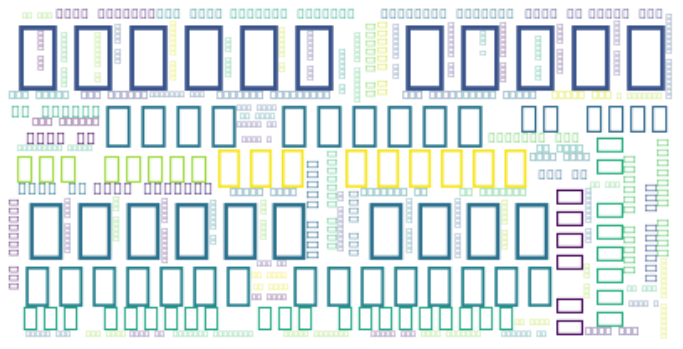

In [292]:
d = data['judgment_text'].str.cat(sep=' ')
plt.figure(figsize=(12,10))
wordcloud_neg = WordCloud(max_font_size=200, background_color="white").generate(d) 
plt.imshow(wordcloud_neg, interpolation='bilinear')
plt.axis('off')
plt.title("");

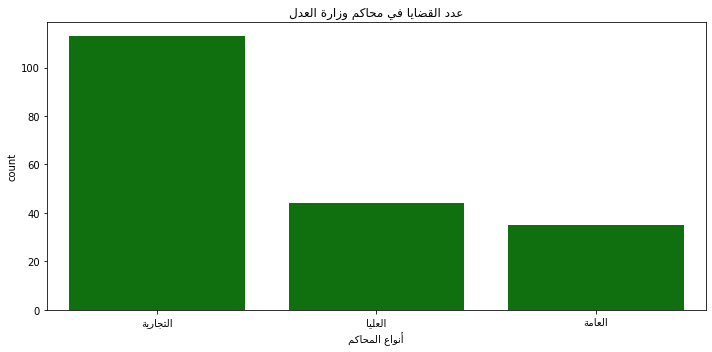

In [79]:
zlbl= get_display( arabic_reshaper.reshape('عدد القضايا في محاكم وزارة العدل'))
plt.figure(figsize=(10,5))
plt.title(zlbl)
df_tuple =list(zip(data['court']))
first_columns= [get_display( arabic_reshaper.reshape(x[0])) for x in df_tuple]
xlbl = get_display( arabic_reshaper.reshape(' أنواع المحاكم '))
sns.countplot(x=first_columns, data=data, color='green');
plt.xlabel(xlbl, fontdict=None, labelpad=None)
plt.tight_layout()
plt.show()